# Titanic data preprocessing
## Kamil Misiak

W tym sprawozdaniu poruszę temat czyszczenia i przygotowania danych do analizy. Zostanie to przedstawione na przykładzie zbioru danych "titanic".

## Agenda
1. Załadowanie zbioru danych i wstępne statystyki
2. Określenie typów danych
3. Czyszczenie pustych wartości
4. Usuwanie zbędnych atrybutów
5. Pomiar dokładności klasyfikacji na przygotowanym zbiorze danych
6. Zapis zbioru i podsumowanie

## Krok 1: Załadowanie zbioru danych i wstępne statystyki

In [1]:
# Przygotowanie danych
import pandas as pd
import numpy as np

# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Klasyfikacja
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Załadowanie zbioru
data = pd.read_table('./data/TitanicMess.tsv', sep='\t', header=0)

#### Następnie przyjrzmy się atrybutom które występują w zbiorze danych

In [2]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'ship'],
      dtype='object')

#### Następnie wyświetlimy 5 pierwszych rekordów

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic


#### Oraz końcowe 5 rekordów

In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,Titanic
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic
891,1000,1,1,Mr. Frederick Maxfield Hoyt,male,38,1,0,19943,90,C93,S,Titanic


#### Podgląd zbioru

In [5]:
print(data.shape)
print('\n')
print(data.dtypes)

(892, 13)


PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object


#### Liczba atrybutów oraz typ danych

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    int64 
 1   Survived     892 non-null    int64 
 2   Pclass       892 non-null    int64 
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          719 non-null    object
 6   SibSp        892 non-null    int64 
 7   Parch        892 non-null    int64 
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        207 non-null    object
 11  Embarked     890 non-null    object
 12  ship         892 non-null    object
dtypes: int64(5), object(8)
memory usage: 90.7+ KB


Jak widać w zbiorze mamy 892 rekrody, które zawierają 13 atrybutów.
#### Następnie wyświetlimy podstawowe statystki opisowe atrybutów

In [7]:
data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch
count,892.000000,892.000000,892.000000,892.000000,892.000000
mean,445.762332,0.386771,2.307175,0.525785,0.371076
std,257.990085,0.487284,0.836750,1.102190,0.768468
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,0.000000,0.000000
50%,444.500000,0.000000,3.000000,0.000000,0.000000
75%,668.250000,1.000000,3.000000,1.000000,0.000000
max,1000.000000,1.000000,3.000000,8.000000,5.000000


## Krok 2: Określenie typów danych

Niektóre kolumny posiadają źle określony typ danych, co może skutkować błędami w dalszym przygotowaniu zbioru do analizy. Nasze przygotowanie rozpoczniemy od wskazania prawidłowego typu danych w kolumnach.

Atrybut "Age" zawiera liczby typu "float" odzielone znakiem przecinka, co jest błędnie rozpoznawana przez interpreter. Aby typ kolumny został prawidłowo przekonwerotowany do typu float, musimy zamienieć znak przecnika na kropkę.

In [8]:
data.Age = data['Age'].str.replace(',', '.').astype('float64')

W atrybucie "Fare" dodatkowo jeden z wierszy zawiera znak alfanumeryczny. Musimy przefiltrować wartości kolumny, aby zawierała tylko cyfry.

In [9]:
data['Fare'] = data['Fare'].str.extract('(\d+)', expand=False)
data['Fare'] = data['Fare'].str.replace(',', '.').astype('float64')

Po przekstałecniu typów danych tak prezentują się kolumny oraz 10 pierwszych wierszy zbioru.

In [10]:
data['Survived'] = data['Survived'].astype('bool')
print(data.dtypes)
data.head(10)

PassengerId      int64
Survived          bool
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
ship            object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.0,NaN,S,Titanic
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.0,C85,C,Titanic
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.0,NaN,S,Titanic
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.0,C123,S,Titanic
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0,NaN,S,Titanic
5,6,False,3,"Moran, Mr. James",male,NaN,0,0,330877,8.0,NaN,Q,Titanic
6,7,False,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.0,E46,S,Titanic
7,8,False,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0,NaN,S,Titanic
8,9,True,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.0,NaN,S,Titanic
9,10,True,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0,NaN,C,Titanic


## Krok 3: Czyszczenie pustych wartości

#### Sprawdzamy ile atrybutów ma wartości puste

In [11]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,685,76.8
Age,173,19.4
Embarked,2,0.2
ship,0,0.0
Fare,0,0.0


#### Heatmapa brakujących wartości

<AxesSubplot:>

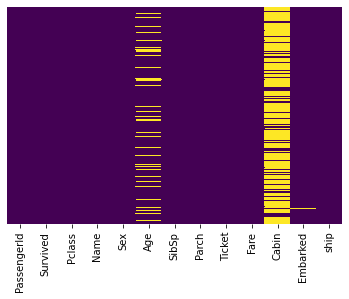

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Jak widać najwięcej pustych wartości zawierają kolumny "Age" oraz "Cabin". Ilość brakujących wartości atrybutu "Age" to około 20%, w dalszej części spróbujemy uzupełnić brakujące wartości. Natomiast braki atrybutu "Cabin" są na tyle duże, że nie jesteśmy w stanie przewidzieć wartości brakujących atrybutów.

#### Uzupełnimy brakujące wartośći atrybutu "Age"

Przyjrzymy się rozkładowi atrybutu "Age" ze względu na klasę poróży pasażerów, jak widać jedna z wartości przyjmuje wartość ponad 4000. Jest to dana odstająca, którą należy usunąć przed dalszą analizą.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

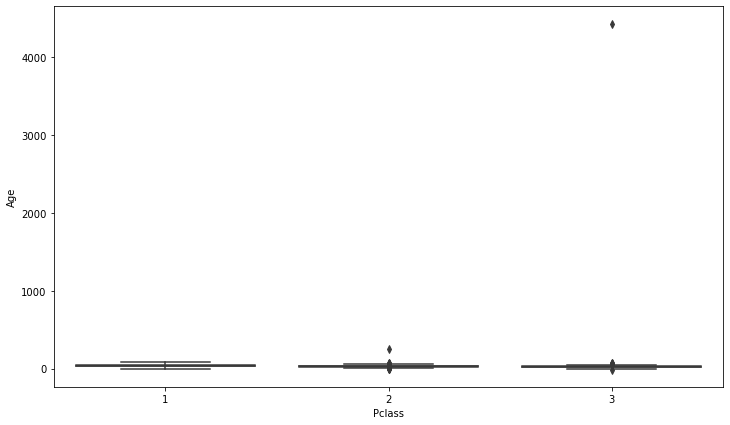

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Usuwamy odstające wartości z atrybutu wiek. Przyjmuję że wszystkie wartości powyżej 100 oraz poniżej 0 są odstające. Wartość od 0 do 100, stanowią standardową długość życia człowieka.

In [14]:
max_thresold = 100
min_thresold = 0
data[(data.Age > max_thresold) | (data.Age < min_thresold)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
223,224,False,3,"Nenkoff, Mr. Christo",mal,4435.0,0,0,349234,7.0,NaN,S,Titanic
507,508,True,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,-3.0,0,0,111427,26.0,NaN,S,Titanic
522,523,False,3,"Lahoud, Mr. Sarkis",male,-12.0,0,0,2624,7.0,NaN,C,Titanic
666,667,False,2,"Butler, Mr. Reginald Fenton",male,250.0,0,0,234686,13.0,NaN,S,Titanic


In [15]:
data.loc[(data.Age > max_thresold) | (data.Age < min_thresold), 'Age'] = np.nan

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

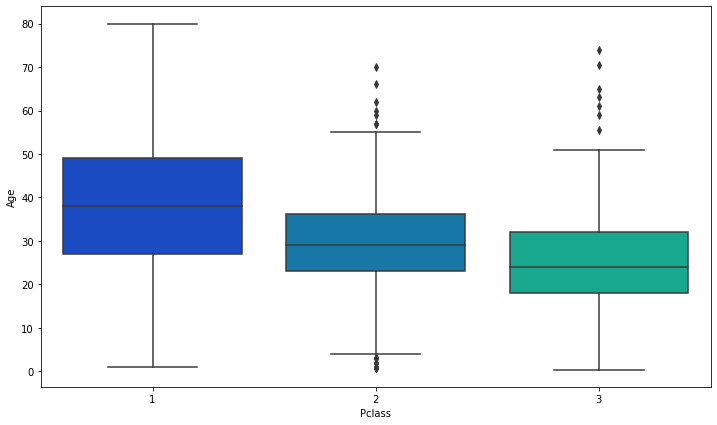

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

Teraz możemy rozwiązać problem z brakującymi wartościami atrybutu "Age". Utworzę tablicę zawierającą liczby losowe, które są obliczane na podstawie średniej wartości wieku w odniesieniu do odchylenia standardowego.

In [17]:
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()

#  Losujmey wartości z przedziału wartości średniej i odchylenia standardowego atrybutu "Age"
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# Uzpełniamy puste wartości w atrybucie "Age" wylosowanymi wartościami
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)
data["Age"].isnull().sum()

0

Ponownie heatmap. Jak widać brakujące wartości atrybutu "Age" zostały usunięte.

<AxesSubplot:>

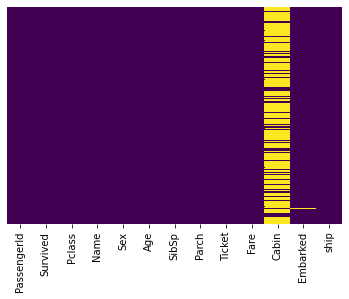

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Następnie zajmiemy się wartością atrybutu "Cabin"
Atrybut "Cabin" zawiera bardzo dużo brakujących wartości. Atrybut "Cabin" przyjumuje zazwyczaj wzór „C123”, gdzie litera odnosi się do pokładu. Dlatego zamierzam ją wyodrębnić i stworzyć nowy atrybut, który zawiera tablicę pokładów. Następnie przekonwertujemy tą wartość na zmienną numeryczną. Brakujące wartości zostaną zamienione na zero.

In [19]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data['Cabin'] = data['Cabin'].fillna("U0")
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)
    
# Możemy teraz usunąć atrybut Cabin
data = data.drop(['Cabin'], axis=1)

Wygląd zbioru po preprocessingu

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship,Deck
0,1,False,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.0,S,Titanic,8
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.0,C,Titanic,3
2,3,True,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.0,S,Titanic,8
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.0,S,Titanic,3
4,5,False,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0,S,Titanic,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,True,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0,S,Titanic,2
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20,1,2,W./C. 6607,23.0,S,Titanic,8
889,890,True,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0,C,Titanic,3
890,891,False,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.0,Q,Titanic,8


#### Przygotowanie wartośći atrybutu "Embarked"

Ponieważ atrybut "Embarked" ma tylko 2 brakujące wartości, wypełnimy je najczęściej występującymi wartościami.

In [21]:
data['Embarked'].describe()

count     890
unique      6
top         S
freq      643
Name: Embarked, dtype: object

In [22]:
common_value = 'S'

data['Embarked'] = data['Embarked'].fillna(common_value)

Zamienimy wartości atrybutu "Embarked", na wartości numeryczne

In [23]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'So', 'Co', 'Qe'], dtype=object)

In [24]:
ports = {"S": 0, "C": 1, "Q": 2, "So": 0, "Co": 1, "Qe": 2}

data['Embarked'] = data['Embarked'].map(ports)

#### Przygotowanie wartośći atrybutu "Name"

Wykorzystamy atrybut "Name", aby wyodrębnić tytuły z jego wartości. Stworzymy na podstawie tych wartości nowy atrybut.

In [25]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# Wyodrębnie tytułów
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Zamiana rzadko występujących tytułów na te bardziej popularne
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Zamiana tytłów na wartości numeryczne
data['Title'] = data['Title'].map(titles)

# Uzupełnienie pustych wartości, wartością 0
data['Title'] = data['Title'].fillna(0)

data = data.drop(['Name'], axis=1)

#### Przygotowanie wartości atrybutu "Sex"

Wartości występujące w atrybucie "Sex"

In [26]:
data['Sex'].unique()

array(['male', 'female', 'malef', 'mal', 'fem', 'femmale'], dtype=object)

Zamieniamy wartości atrybutu "Sex", na wartości numeryczne.

In [27]:
genders = {"male": 0, "female": 1, "malef": 0, "mal": 0, "fem": 1, "femmale": 1}
data['Sex'] = data['Sex'].map(genders)

#### Przygotowanie wartości atrybutu "Ticket"

In [28]:
data['Ticket'].describe()

count      892
unique     680
top       1601
freq         7
Name: Ticket, dtype: object

Ponieważ atrybut Ticket ma 681 unikalnych wartości, przekształcenie ich w przydatne kategorie byłoby nieco trudniejsze. Więc usuniemy go ze zbioru danych.

In [29]:
data = data.drop(['Ticket'], axis=1)

## Krok 5: Pomiar dokładności klasyfikacji na przygotowanym zbiorze danych

W ostatnim kroku usnuniemy jeszcze ze zbioru niepotrzebne atrybuty, takie jak:  
PassengerId - Atrybut okresląjący id pasażera, nie wnoszący nic do analizy danych  
ship - Atrybut zawsze przyjmujący tą samą wartość.  
Survived - Atrybut decyzyjny

In [30]:
X_data = data.drop(["PassengerId", "ship",  "Survived"], axis=1)
X_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,3,0,22,1,0,7.0,0,8,1.0
1,1,1,38,1,0,71.0,1,3,3.0
2,3,1,26,0,0,7.0,0,8,2.0
3,1,1,35,1,0,53.0,0,3,3.0
4,3,0,35,0,0,8.0,0,8,1.0
...,...,...,...,...,...,...,...,...,...
887,1,1,19,0,0,30.0,0,2,2.0
888,3,1,20,1,2,23.0,0,8,2.0
889,1,0,26,0,0,30.0,1,3,1.0
890,3,0,32,0,0,7.0,2,8,1.0


In [31]:
Y_data = data.Survived;

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_data, Y_data, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.03


Udało się uzyskać dokładność na poziomie około 78%.

## Krok 6: Zapis zbioru i podsumowanie

#### Zapis zbioru do pliku

In [32]:
data.to_csv('./data/TitanicCleaned.tsv', sep='\t')

#### Podusmowanie
Przygotowanie zbioru pozwala wykorzystać go w różnego rodzaju analizach. Również przygotowany zbiór pozowli zauważyć więcej zależnosći w danych oraz uzyskać lepsze wyniki podczas wykorzystania algorytmów uczenia maszynowego.